In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_ab = pd.read_pickle('./output/1_df_raf_final-win-0924.pkl.zstd', compression='zstd')

df_b = pd.read_pickle('output/1_df_b_rafs_new-win-0924.pkl.zstd', compression='zstd')
df_b_shaders = pd.read_pickle('./output/1_df_b_shaders-win-0924.pkl.zstd', compression='zstd')
df_b_offscreen = pd.read_pickle('./output/1_df_raf_offscreen-win-0924.pkl.zstd', compression='zstd')
df_b_extensions = pd.read_pickle('./output/1_df_raf_extensions-win-0924.pkl.zstd', compression='zstd')


In [3]:
df_b_programs = pd.read_pickle('./output/1_df_programs-win-0924.pkl.zstd', compression='zstd')

In [24]:
draw_calls = df_ab[['maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElementsInstanced']].sum(axis=1)
vertex_count = df_ab['maghsk.counter.vertexCount']
texture_count = df_ab['maghsk.counter.resources.Texture']
program_count = df_ab['maghsk.counter.resources.Program']
# texture_size = df_ab['textureSize']
program_length = df_b_shaders.groupby('index_webapp')['source'].apply(lambda x: sum(len(y) for y in x))
dfs = [draw_calls, vertex_count, texture_count, program_count, program_length]
df_plot = pd.concat(dfs, axis=1, keys=['Draw Calls', 'Vertex Count', 'Texture Count', 'Program Count', 'Shader Length (KB)'])
df_plot.to_pickle('./output/df_complexity.pkl.zstd', compression='zstd')
df_plot

,Draw Calls,Vertex Count,Texture Count,Program Count,Shader Length (KB)
2,2508.0,99396.0,115.0,16.0,37038.0
11,59400.0,568800.0,4.0,6.0,4901.0
15,39732.0,940324.0,22.0,10.0,14394.0
17,45269.0,12953871.0,886.0,27.0,143560.0
20,28896.0,6130768.0,43.0,50.0,150832.0
...,...,...,...,...,...
29217,7826.0,5964616.0,39.0,27.0,549818.0
29219,7800.0,104400.0,15.0,8.0,10366.0
29221,7774.0,46644.0,32.0,3.0,1760.0
29224,4439.0,26514.0,74.0,22.0,27214.0


In [25]:
df_perf = pd.read_pickle('../performance/output/df_performance-mac-15s-0924.pkl.zstd', compression='zstd')
df_perf = df_perf[df_perf.status == 'Ok'].drop(columns='status')
ok_index = df_perf.index

In [26]:
df_perf[df_perf['frames_count'].str.len() > 1]

,cpu_real,cpu_full,gpu_real,gpu_full,webgl_time,dropped_frame_duration,frames_count
1145,0.958737,1.425565,0.192862,0.311119,0.001377,0.183337,"[588, 599]"
1604,0.865457,1.133949,0.926193,1.075975,0.574131,-1.000000,"[600, 600]"
3175,1.662112,1.839336,0.192349,0.210991,0.000728,-1.000000,"[1, 599]"
8481,0.984098,1.038842,0.152714,0.163260,0.000931,0.016667,"[2, 600]"
9106,1.306788,1.637622,0.254110,0.363724,0.002124,0.100002,"[593, 1]"
9419,1.508511,1.654305,0.867174,0.883343,0.557905,-1.000000,"[600, 600]"
9481,0.589448,0.605619,0.053000,0.054462,0.025514,-1.000000,"[600, 600]"
9487,1.613241,10.235114,9.796485,9.848244,8.262141,9.417441,"[39, 600]"
12383,1.201412,1.689972,0.344326,0.486775,0.001619,0.483343,"[571, 600]"
14386,1.979177,2.113516,2.107894,3.735524,3.487784,-1.000000,"[600, 600]"


In [27]:
idx = [1145, 9487,12383]
df_perf.loc[idx, 'frames_count'] = df_perf.loc[idx,'frames_count'].apply(lambda x: [max(600, min(x))])

In [28]:
df_perf['FPS'] = df_perf['frames_count'].map(lambda x: min(600, max(x)) / 10)

In [29]:
df_ab = df_ab.join(df_perf[[]], how='right', lsuffix='_ab', rsuffix='_perf').fillna(0)

In [30]:
df_b_shaders = df_b_shaders[df_b_shaders['index_webapp'].isin(ok_index)]

In [31]:
df_b = df_b.join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b = df_b[df_b['index_webapp'].isin(ok_index)]

In [32]:
df_b_offscreen = pd.DataFrame(df_b_offscreen).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b_offscreen = df_b_offscreen[df_b_offscreen['index_webapp'].isin(ok_index)].set_index('index_webapp')

KeyError: 'index_webapp'

In [ ]:
df_b_extensions = pd.DataFrame(df_b_extensions).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b_extensions = df_b_extensions[df_b_extensions['index_webapp'].isin(ok_index)]

In [33]:
df_plot = pd.DataFrame(df_plot).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_plot = df_plot[df_plot['index_webapp'].isin(ok_index)].set_index('index_webapp')

KeyError: 'index_webapp'

In [34]:
df_b_programs = df_b_programs[df_b_programs['index_webapp'].isin(ok_index)]

In [35]:
def plot_cdf(arr, *args, ax, **kwargs):
    arr = np.sort(arr)
    y = np.arange(len(arr)) / float(len(arr))
    if ax is None:
        plt.plot(arr, y, *args, **kwargs)
    else:
        ax.plot(arr, y, *args, **kwargs)

# Draw Calls, Vertex Count, Texture Size, Texture Count, Shader Count, Shader Length

In [36]:
df_b['maghsk.counter.textureFormat']

1.0                                                       []
2.0                                                       []
3.0        [[6408, 1, 1], [6408, 1, 1], [6408, 1, 1], [64...
4.0        [[6408, 1, 1], [6408, 1, 1], [6408, 1, 1], [64...
5.0        [[6408, 1, 1], [6408, 1, 1], [6408, 1, 1], [64...
                                 ...                        
32719.0                                                   []
32720.0                                    [[6408, 160, 20]]
32721.0                                                   []
32722.0    [[6407, 1, 1], [6408, 512, 512], [6408, 512, 5...
32725.0                                       [[6408, 1, 1]]
Name: maghsk.counter.textureFormat, Length: 12843, dtype: object

In [37]:
df_plot['FPS'] = df_perf['FPS']

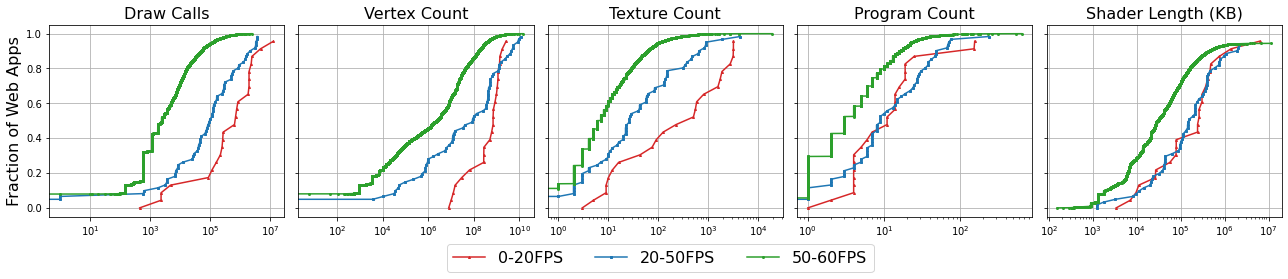

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 3.5), sharey=True)
for i, col in enumerate(df_plot.columns[:-1]):
    plot_cdf(df_plot.loc[(df_plot.FPS<=20), col], '^-', ax=ax[i], markersize=2, color='tab:red')
    plot_cdf(df_plot.loc[(df_plot.FPS>20) & (df_plot.FPS<=50), col], 's-', ax=ax[i], markersize=2, color='tab:blue')
    plot_cdf(df_plot.loc[(df_plot.FPS>50), col], 'o-', ax=ax[i], markersize=2, color='tab:green')
    ax[i].set_title(col, fontsize=16)
    ax[i].set_xscale('log')
    # grid on
    ax[i].grid()
    ax[i].set_axisbelow(True)
    # ax[i].set_ylabel('Fraction of Web Apps', fontsize=13)
ax[0].set_ylabel('Fraction of Web Apps', fontsize=16)
plt.tight_layout()
# ax[-1].set_xlabel('Bytes', fontsize=16)
ax[0].legend(['0-20FPS', '20-50FPS', '50-60FPS'], loc='lower center', bbox_to_anchor=(2.6, -0.33), ncol=3, fontsize=16)
plt.savefig('output/fig/complexity_cdf.png', bbox_inches='tight', dpi=500)

# TPD 柱状图

In [21]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))


# tt = df_b[[x for x in df_b.columns if x.startswith('maghsk.counter.textureTypes.')]].sum(axis=0)
# tt.index = [x.split('.')[-1] for x in tt.index]
# tt = tt.sort_values(ascending=False)
# ax[0,0].bar(np.arange(len(tt)), tt.values)
# ax[0,0].set_yscale('log')
# ax[0,0].set_xticks(np.arange(len(tt)), tt.index, rotation=90)

# tf = df_b['maghsk.counter.textureFormat'].explode().dropna().map(lambda x: x[0] if isinstance(x, list) else x).value_counts().drop(0)
# index_map = {
#     6402: 'DC',
#     6406: 'ALPHA',
#     6407: 'RGB',
#     6408: 'RGBA',
#     6409: 'LUMINANCE',
#     32849: 'RGB8',
#     32856: 'RGBA8',
#     33190: 'DC24',
#     33325: 'R16F',
#     33326: 'R32F',
#     34836: 'RGBA32F',
#     34842: 'RGBA16F',
#     35898: 'RGB_NOSIGN',
#     33321: 'R8',
#     33189: 'DC16',
#     35056: 'D24S8',
#     34843: 'RGB16F',
# }
# tf.index = tf.index.map(lambda x: index_map[x] if x in index_map else x)
# ax[0,1].bar(np.arange(len(tf)), tf.values)
# ax[0,1].set_yscale('log')
# ax[0,1].set_xticks(np.arange(len(tf)), tf.index, rotation=90)


# pc = df_ab[[
#     'maghsk.counter.primitiveCount.0',
#     'maghsk.counter.primitiveCount.1',
#     'maghsk.counter.primitiveCount.2',
#     'maghsk.counter.primitiveCount.3',
#     'maghsk.counter.primitiveCount.4',
#     'maghsk.counter.primitiveCount.5',
#     'maghsk.counter.primitiveCount.6',
# ]].copy()
# column_map = {
#     'maghsk.counter.primitiveCount.0': 'POINTS',
#     'maghsk.counter.primitiveCount.1': 'LINES',
#     'maghsk.counter.primitiveCount.2': 'LINE_LOOP',
#     'maghsk.counter.primitiveCount.3': 'LINE_STRIP',
#     'maghsk.counter.primitiveCount.4': 'TRIANGLES',
#     'maghsk.counter.primitiveCount.5': 'TRIANGLE_STRIP',
#     'maghsk.counter.primitiveCount.6': 'TRIANGLE_FAN',
# }
# pc = pc.rename(columns=column_map).sum(axis=0)
# ax[1,0].bar(np.arange(len(pc)), pc.values)
# ax[1,0].set_yscale('log')
# ax[1,0].set_xticks(np.arange(len(pc)), pc.index, rotation=90)


# draw = df_ab[[
#     'maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElementsInstanced'
# ]].copy()
# draw = draw.sum(axis=0).rename({
#     'maghsk.counter.funcCount.drawArrays': 'DA',
#     'maghsk.counter.funcCount.drawElements': 'DE',
#     'maghsk.counter.funcCount.drawArraysInstanced': 'DAI',
#     'maghsk.counter.funcCount.drawElementsInstanced': 'DEI',
# })
# ax[1,1].bar(np.arange(len(draw)), draw.values)
# ax[1,1].set_yscale('log')
# ax[1,1].set_xticks(np.arange(len(draw)), draw.index, rotation=90)

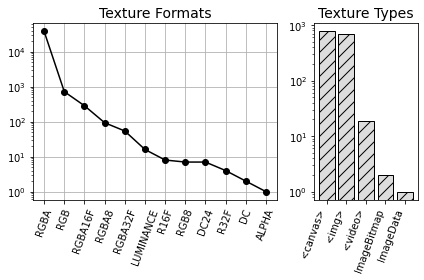

In [94]:
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1, rowspan=1)
tf = df_b['maghsk.counter.textureFormat'].explode().dropna().map(lambda x: x[0] if isinstance(x, list) else x).value_counts().drop(0)
index_map = {
    6402: 'DC',
    6406: 'ALPHA',
    6407: 'RGB',
    6408: 'RGBA',
    6409: 'LUMINANCE',
    32849: 'RGB8',
    32856: 'RGBA8',
    33190: 'DC24',
    33325: 'R16F',
    33326: 'R32F',
    34836: 'RGBA32F',
    34842: 'RGBA16F',
    35898: 'RGB_NOSIGN',
    33321: 'R8',
    33189: 'DC16',
    35056: 'D24S8',
    34843: 'RGB16F',
}
tf.index = tf.index.map(lambda x: index_map[x] if x in index_map else x)
ax1.plot(np.arange(len(tf)), tf.values, 'o-', color="black")
ax1.set_yscale('log')
ax1.set_xticks(np.arange(len(tf)), tf.index, rotation=70)
ax1.set_title('Texture Formats', fontsize=14)
ax1.grid()

tt = df_b[[x for x in df_b.columns if x.startswith('maghsk.counter.textureTypes.')]].sum(axis=0)
index_map = {
    'maghsk.counter.textureTypes.HTMLCanvasElement': '<canvas>',
    'maghsk.counter.textureTypes.HTMLVideoElement': '<video>',
    'maghsk.counter.textureTypes.HTMLImageElement': '<img>',
    'maghsk.counter.textureTypes.ImageData': 'ImageData',
    'maghsk.counter.textureTypes.ImageBitmap': 'ImageBitmap',
}
tt.index = tt.index.map(lambda x: index_map[x] if x in index_map else x)
tt = tt.sort_values(ascending=False)
ax2.bar(np.arange(len(tt)), tt.values, color="#ddd", edgecolor="black", hatch='//')
ax2.set_yscale('log')
ax2.set_xticks(np.arange(len(tt)), tt.index, rotation=70, ha='right')
ax2.set_title('Texture Types', fontsize=14)
plt.tight_layout()
plt.savefig('output/fig/4_texture_types.pdf', bbox_inches='tight')

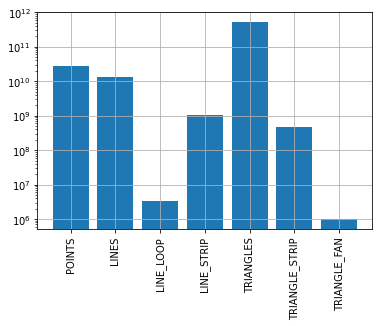

In [24]:

pc = df_ab[[
    'maghsk.counter.primitiveCount.0',
    'maghsk.counter.primitiveCount.1',
    'maghsk.counter.primitiveCount.2',
    'maghsk.counter.primitiveCount.3',
    'maghsk.counter.primitiveCount.4',
    'maghsk.counter.primitiveCount.5',
    'maghsk.counter.primitiveCount.6',
]].copy()
column_map = {
    'maghsk.counter.primitiveCount.0': 'POINTS',
    'maghsk.counter.primitiveCount.1': 'LINES',
    'maghsk.counter.primitiveCount.2': 'LINE_LOOP',
    'maghsk.counter.primitiveCount.3': 'LINE_STRIP',
    'maghsk.counter.primitiveCount.4': 'TRIANGLES',
    'maghsk.counter.primitiveCount.5': 'TRIANGLE_STRIP',
    'maghsk.counter.primitiveCount.6': 'TRIANGLE_FAN',
}
pc = pc.rename(columns=column_map).sum(axis=0)
plt.bar(np.arange(len(pc)), pc.values)
plt.yscale('log')
plt.xticks(np.arange(len(pc)), pc.index, rotation=90)
plt.grid()
plt.savefig('output/fig/4_primitive_count.pdf', bbox_inches='tight')

In [41]:
df_ab['FPS'] = df_perf['FPS'].map(lambda x: '0-20 FPS' if x <= 20 else ('20-50 FPS' if x <= 50 else '50-60 FPS'))

In [42]:
import seaborn as sns

In [43]:
draw = df_ab[[
    'maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElementsInstanced', 'FPS'
]].copy()
draw.rename(columns={
    'maghsk.counter.funcCount.drawArrays': 'DA',
    'maghsk.counter.funcCount.drawElements': 'DE',
    'maghsk.counter.funcCount.drawArraysInstanced': 'DAI',
    'maghsk.counter.funcCount.drawElementsInstanced': 'DEI',
}, inplace=True)
# group by FPS and then draw each bar plot
draw = draw.groupby('FPS').sum().reset_index(drop=False)
draw

,FPS,DA,DE,DAI,DEI
0,0-20 FPS,6674700.0,27042630.0,0.0,189430.0
1,20-50 FPS,5408601.0,26603134.0,0.0,48944.0
2,50-60 FPS,58094680.0,96166634.0,246125.0,2827258.0


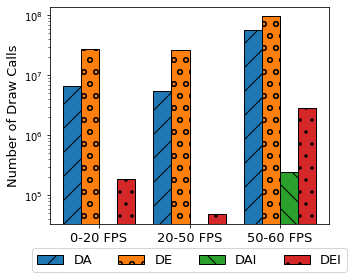

In [46]:
# 转换为datafrmae
df = pd.DataFrame(draw)

# 转换数据为tidy格式
df_melted = df.melt(id_vars='FPS', value_vars=['DA', 'DE', 'DAI', 'DEI'], var_name = 'group', value_name = 'value')
plt.figure(figsize=(5, 4))
# 创建分组barplot
# sns.barplot(x='FPS', y='value', hue='group', data=df_melted, errorbar='sd')
width = 0.2
x = np.arange(len(draw))
plt.bar(x+width*0, draw['DA'].values, width, label='DA', hatch='/', edgecolor='black')
plt.bar(x+width*1, draw['DE'].values, width, label='DE', hatch='o', edgecolor='black')
plt.bar(x+width*2, draw['DAI'].values, width, label='DAI', hatch='\\', edgecolor='black')
plt.bar(x+width*3, draw['DEI'].values, width, label='DEI', hatch='.', edgecolor='black')
plt.yscale('log')
# add hatch
plt.legend(ncol=4, fontsize=13, loc='lower center', bbox_to_anchor=(0.5, -0.25))
plt.xlabel('')
plt.ylabel('Number of Draw Calls', fontsize=13)
plt.xticks(x+width*1.5, draw['FPS'].values, fontsize=13)
plt.savefig('output/fig/4_draw_calls.pdf', bbox_inches='tight')
# plt.grid(axis='y')

-----

# process

In [51]:
df_b['maghsk.createArguments.0'].value_counts()

maghsk.createArguments.0
webgl                 9421
webgl2                3792
experimental-webgl     335
0                      122
Name: count, dtype: int64

In [66]:
import hashlib

In [67]:
tmp = (df_b_programs['vertexShaderSouceTranslated'] + df_b_programs['fragmentShaderSouceTranslated'])
df_b_programs['hash'] = tmp.apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())

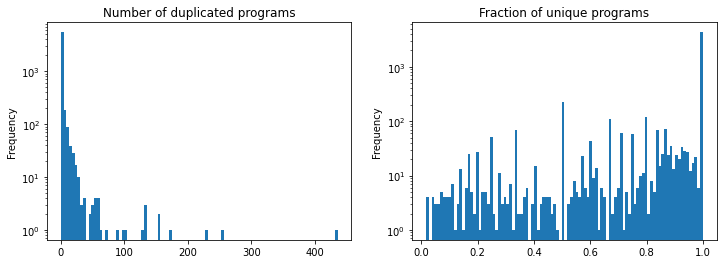

In [86]:
t = df_b_programs.groupby('index_webapp')['hash']
tt1 = t.count() - t.nunique()
tt2 = t.nunique() / t.count()
plt.figure(figsize=(12, 4))
plt.subplot(121)
tt1.plot.hist(bins=100, title='Number of duplicated programs', logy=True)
plt.subplot(122)
tt2.plot.hist(bins=100, title='Fraction of unique programs', logy=True)
plt.savefig('output/fig/2_programs.png', dpi=300, bbox_inches='tight')

In [85]:
df_b_programs['hash'].nunique(), df_b_programs['hash'].count()

(17330, 45600)

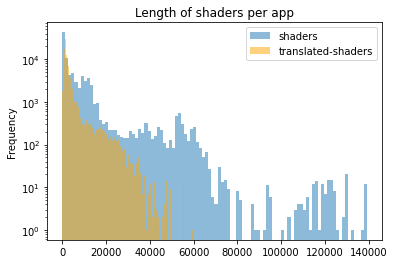

In [9]:
df_b_shaders.source.map(lambda x: len(x)).plot(kind='hist', bins=100, logy=True, title='Length of shaders per app', alpha=0.5)
df_b_shaders.translatedSource.map(lambda x: len(x)).plot(kind='hist', bins=100, logy=True, title='Length of shaders per app', color='orange', alpha=0.5)
plt.legend(['shaders', 'translated-shaders'])
plt.savefig('output/fig/2_shaders_length.png', dpi=300)

In [10]:
df_b_shaders.translatedSource.count(), df_b_shaders.translatedSource.nunique()

(90424, 23059)

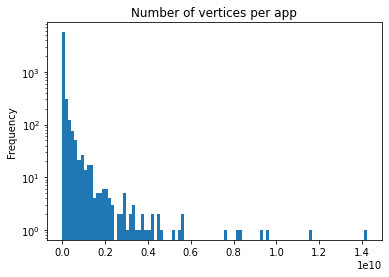

In [17]:
df_ab['maghsk.counter.vertexCount'].plot(kind='hist', bins=100, logy=True, title='Number of vertices per app')
plt.savefig('output/fig/2_vertices.png', dpi=300)

In [14]:
df_ab['maghsk.counter.primitiveCount'] = df_ab['maghsk.counter.primitiveCount.0'] + (df_ab['maghsk.counter.primitiveCount.1'] + df_ab['maghsk.counter.primitiveCount.2'] + df_ab['maghsk.counter.primitiveCount.3']) / 2 + (df_ab['maghsk.counter.primitiveCount.4'] + df_ab['maghsk.counter.primitiveCount.5'] + df_ab['maghsk.counter.primitiveCount.6']) / 3

<Axes: title={'center': 'Number of primitives per app'}, ylabel='Frequency'>

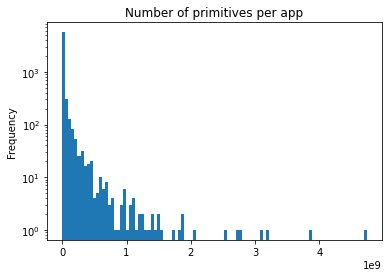

In [15]:
df_ab['maghsk.counter.primitiveCount'].plot(kind='hist', bins=100, logy=True, title='Number of primitives per app')

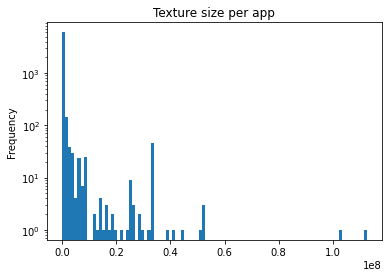

In [21]:
df_ab['textureSize'].plot(kind='hist', bins=100, logy=True, title='Texture size per app')
plt.savefig('output/fig/2_texture_size.png', dpi=300)

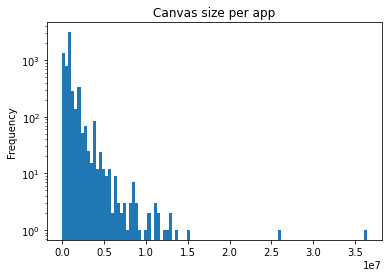

In [23]:
df_ab['canvasSize'].plot(kind='hist', bins=100, logy=True, title='Canvas size per app')
plt.savefig('output/fig/2_canvas_size.png', dpi=300)

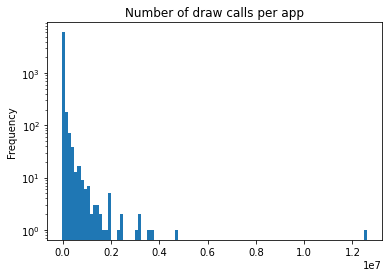

In [14]:
df_ab[['maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawElementsInstanced']].sum(axis=1).plot(kind='hist', bins=100, logy=True, title='Number of draw calls per app')
plt.savefig('output/fig/2_draw_calls.png', dpi=300)

In [29]:
df_b_offscreen['counter.usedOffScreenCanvas'].map(lambda x: [] if x == 0 else sorted(x)).value_counts()

counter.usedOffScreenCanvas
[]                     3939
[2d]                   2458
[webgl2]                  5
[webgl, webgl2]           2
[webgl]                   1
[2d, webgl, webgl2]       1
Name: count, dtype: int64

# performance

In [40]:
df_perf = df_perf[df_perf['frames_count'] < 700]

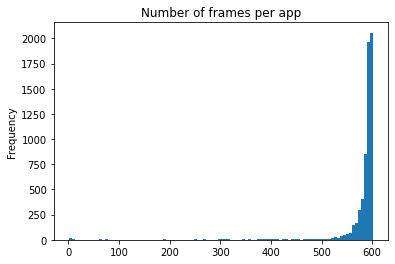

In [48]:
df_perf['frames_count'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_frames.png', dpi=300)

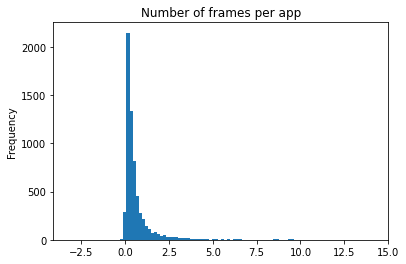

In [49]:
df_perf['cpu_full'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_cpu.png', dpi=300)

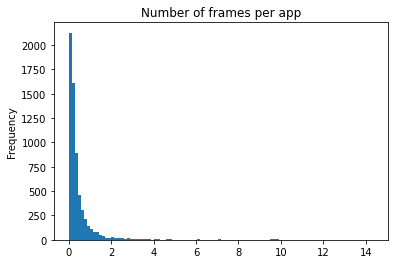

In [50]:
df_perf['gpu_full'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_gpu.png', dpi=300)